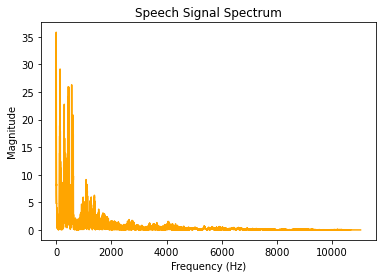

In [27]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_data, sampling_rate = librosa.load("Answering.mp3")

fft_result = np.fft.fft(audio_data)
positive_freqs = fft_result[:len(fft_result) // 2]  

magnitude_spectrum = np.abs(positive_freqs)

frequency_axis = np.linspace(0, sampling_rate / 2, len(positive_freqs))  

plt.plot(frequency_axis, magnitude_spectrum,color='orange')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Speech Signal Spectrum")
plt.show()


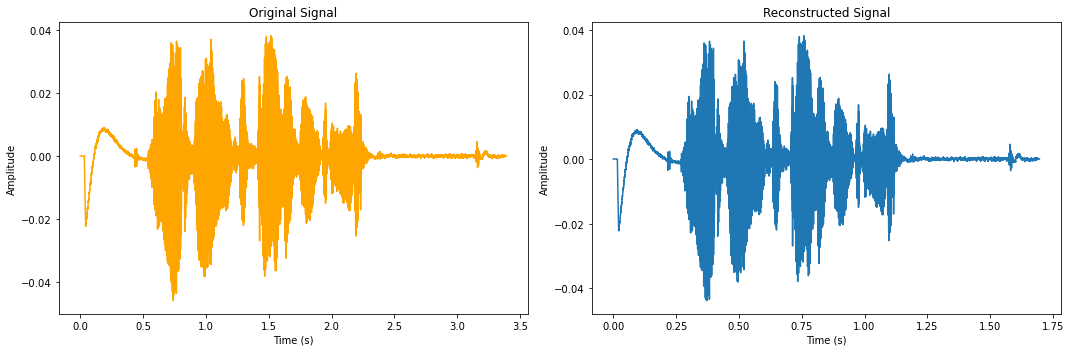

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

audio_data, sampling_rate = librosa.load("Answering.mp3")


fft_result = np.fft.fft(audio_data)
positive_freqs = fft_result[:len(fft_result) // 2] 


time_domain_signal = np.fft.ifft(positive_freqs)


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, len(audio_data) / sampling_rate, len(audio_data)), audio_data,color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, len(time_domain_signal) / sampling_rate, len(time_domain_signal)), time_domain_signal.real)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()


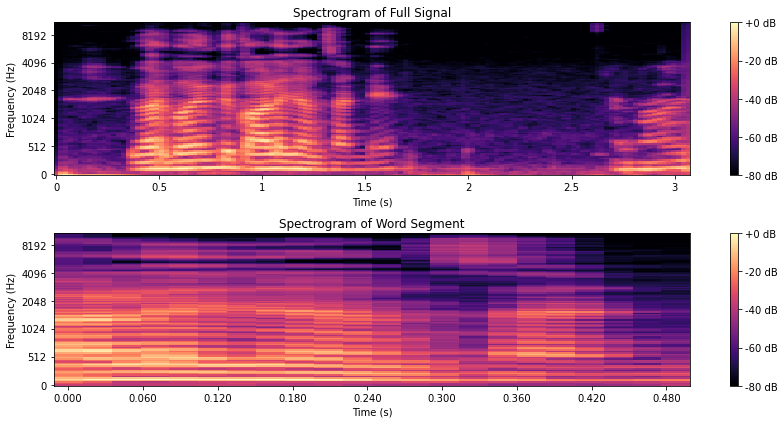

In [15]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


full_signal, sr = librosa.load("Question.mp3")

word_start_time = 1 
word_end_time = 1.5

start_sample = librosa.time_to_samples(word_start_time, sr=sr)
end_sample = librosa.time_to_samples(word_end_time, sr=sr)

# Extract the word segment
word_segment = full_signal[start_sample:end_sample]
full_spec_db = librosa.power_to_db(librosa.feature.melspectrogram(y=full_signal, sr=sr), ref=np.max)
word_spec_db = librosa.power_to_db(librosa.feature.melspectrogram(y=word_segment, sr=sr), ref=np.max)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(full_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Full Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
librosa.display.specshow(word_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Word Segment')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


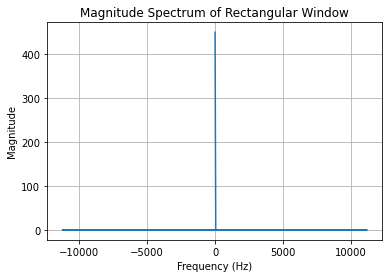

In [17]:
import numpy as np
import matplotlib.pyplot as plt


sampling_rate = 22500  
window_duration = 0.02  

# Generate the rectangular window
window_length = int(window_duration * sampling_rate)
rectangular_window = np.ones(window_length)

# Compute the FFT
fft_result = np.fft.fft(rectangular_window)

# Calculate the frequency axis
frequency_axis = np.fft.fftfreq(window_length, 1 / sampling_rate)

# Plot the magnitude spectrum
plt.plot(frequency_axis, np.abs(fft_result))
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

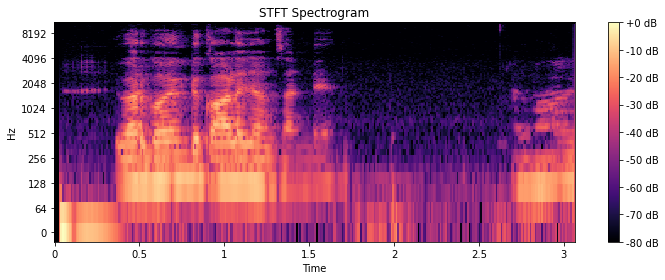

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
y, sr = librosa.load("Question.mp3")

window_length = int(0.02 * sr)
hop_length = int(0.01 * sr)
D = librosa.stft(y, n_fft=window_length, hop_length=hop_length)
D_amplitude = np.abs(D)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D_amplitude, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()

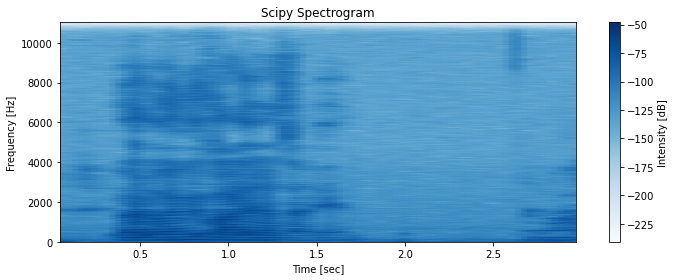

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import librosa
import librosa.display

file_path = "Question.mp3" 
y, sr = librosa.load(file_path)

frequencies, times, spec_scipy = spectrogram(y, fs=sr, nperseg=2048, noverlap=512)

plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud', cmap='Blues') 
plt.title('Scipy Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()
